# EJERCICIO 1

El k-core de un grafo G es un subgrafo maximal donde cada nodo tiene un grado de al menos k. Para este ejercicio, los k-cores y sus respectivos tamaños se determinarán utilizando la función `nx.k_core` de la librería `networkx`. Encontrar el valor k óptimo puede ser un desafío, ya que diferentes valores de k revelan distintas subestructuras cohesivas dentro del grafo.

Implemente una función `k_optimo(G)` que reciba un grafo no dirigido G (de la librería `networkx`). La función debe devolver el valor entero de k que identifica el "k-core óptimo". Este `k_optimo` se define como el valor de k para el cual la reducción en el número de nodos, al pasar del (k-1)-core al k-core (cuyos tamaños se calculan como se mencionó anteriormente), es la máxima. Es decir, buscamos el k que maximiza la diferencia: (número de nodos en el (k-1)-core) - (número de nodos en el k-core).

Si existen empates en la máxima reducción, se debe preferir el valor de k más pequeño. Considera que el 0-core de un grafo G es el propio grafo G.

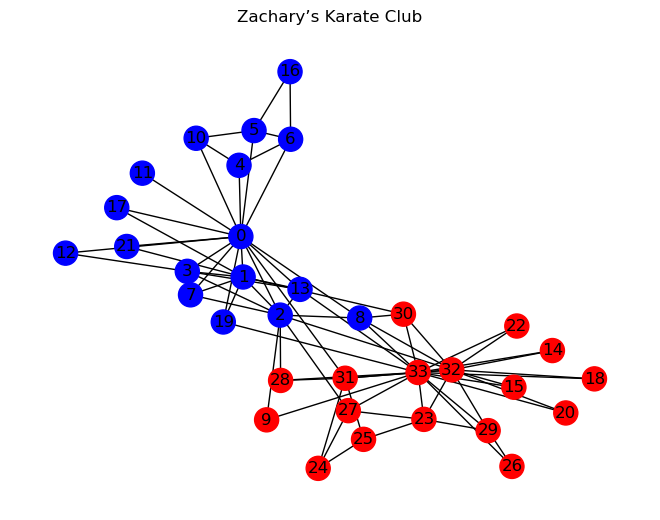

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
club_color = {'Mr. Hi': 'blue', 'Officer': 'red'}
node_colors = [club_color[G.nodes[node]['club']] for node in G.nodes]
pos = nx.spring_layout(G, seed=1)  # Posicionamiento de los nodos
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.Blues)
plt.title("Zachary’s Karate Club")
plt.show()

In [2]:
def k_optimo(G):
    # your code here
    if len(G.nodes) == 0:
        return 1

    # Tamaño del 0-core (grafo original)
    sizes = {0: G.number_of_nodes()}

    # calcular grado máximo para acotar k; incluir +1 para considerar cuando el k-core queda vacío
    if G.number_of_nodes() > 0:
        max_deg = max(dict(G.degree()).values())
    else:
        max_deg = 0

    for k in range(1, max_deg + 2):
        core_k = nx.k_core(G, k)
        sizes[k] = core_k.number_of_nodes()

    # buscar k que maximiza sizes[k-1] - sizes[k]; en empate tomar k más pequeño
    max_reduction = -1
    best_k = 1
    max_k = max(sizes.keys())
    for k in range(1, max_k + 1):
        reduction = sizes[k - 1] - sizes[k]
        if reduction > max_reduction:
            max_reduction = reduction
            best_k = k

    return best_k
    
G_orig_karate = nx.karate_club_graph()
expected_karate = 4
assert k_optimo(G_orig_karate) == expected_karate, f"Failed for Karate Club: Expected {expected_karate}, Got {k_optimo(G_orig_karate)}"

G_empty = nx.Graph()
expected_empty = 1
assert k_optimo(G_empty) == expected_empty, f"Failed for Empty Graph: Expected {expected_empty}, Got {k_optimo(G_empty)}"

### Celda Explicativa

El k-óptimo calculado para el Karate Club es: 4

Analizando la reducción de nodos alrededor del k-óptimo:
Para k=3:
  Nodos en (2)-core: 33
  Nodos en 3-core: 22
  Reducción de nodos: 11
Para k=4:
  Nodos en (3)-core: 22
  Nodos en 4-core: 10
  Reducción de nodos: 12
  <-- Esta es la máxima reducción identificada por k_optimo = 4
Para k=5:
  Nodos en (4)-core: 10
  Nodos en 5-core: 0
  Reducción de nodos: 10


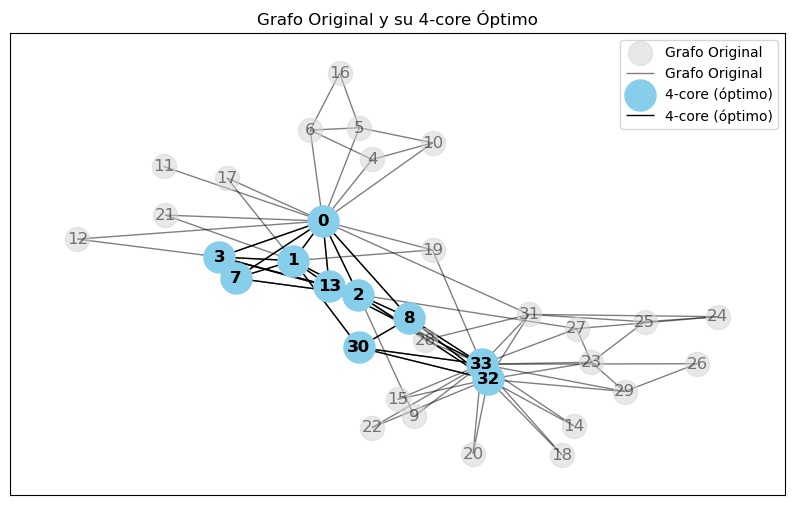

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Usaremos el grafo del Club de Karate como ejemplo
G = nx.karate_club_graph()

# Calculamos el k-óptimo usando la función del estudiante
try:
    k_opt = k_optimo(G)
    print(f"El k-óptimo calculado para el Karate Club es: {k_opt}\n")

    # Mostraremos los tamaños de los k-cores alrededor del k-óptimo
    # para ilustrar la "mayor caída" en el número de nodos.
    
    k_values_to_show = []
    if k_opt > 1:
        k_values_to_show.append(k_opt - 1)
    k_values_to_show.append(k_opt)
    
    # Verificamos si k_opt + 1 es un k válido (no mayor que el grado máximo)
    max_degree_in_G = 0
    if G.nodes():
        node_degrees = [d for _, d in G.degree()]
        if node_degrees:
             max_degree_in_G = max(node_degrees)
    
    if k_opt <= max_degree_in_G : # k_opt + 1 core might be empty but k_opt core might not be
         k_values_to_show.append(k_opt + 1)


    print("Analizando la reducción de nodos alrededor del k-óptimo:")
    
    nodes_in_k_minus_1_core = len(nx.k_core(G, 0).nodes) # N(0-core)
    
    for k_val_show in sorted(list(set(k_values_to_show))):
        if k_val_show == 0: # Should not happen with current logic but good check
            core_graph_show = G
        else:
            core_graph_show = nx.k_core(G, k_val_show)
        
        num_nodes_current = len(core_graph_show.nodes)
        
        if k_val_show > 0: # Calculate reduction from (k-1)-core
            nodes_in_previous_core = len(nx.k_core(G, k_val_show - 1).nodes)
            reduction = nodes_in_previous_core - num_nodes_current
            print(f"Para k={k_val_show}:")
            print(f"  Nodos en ({k_val_show-1})-core: {nodes_in_previous_core}")
            print(f"  Nodos en {k_val_show}-core: {num_nodes_current}")
            print(f"  Reducción de nodos: {reduction}")
            if k_val_show == k_opt:
                print(f"  <-- Esta es la máxima reducción identificada por k_optimo = {k_opt}")
        else: # For k=0, no previous core to compare in this loop logic
             print(f"Para k={k_val_show} (grafo original): Nodos = {num_nodes_current}")


    # Visualización del k-óptimo core
    optimal_core_graph = nx.k_core(G, k_opt)
    pos = nx.spring_layout(G, seed=42) # Usar layout del grafo original para consistencia
    
    plt.figure(figsize=(10,6))
    nx.draw_networkx(G, pos, with_labels=True, node_color='lightgray', alpha=0.5, label="Grafo Original")
    nx.draw_networkx(optimal_core_graph, pos, with_labels=True, node_color='skyblue', 
                     node_size=500, font_weight='bold', label=f"{k_opt}-core (óptimo)")
    plt.title(f"Grafo Original y su {k_opt}-core Óptimo")
    plt.legend()
    plt.show()

except NameError:
    print("La función 'k_optimo_solucion' no está definida. Por favor, ejecute la celda de solución primero.")
except Exception as e:
    print(f"Ocurrió un error durante la explicación: {e}")


# EJERCICIO 2


El concepto de k-core, que identifica subgrafos densamente conectados, también se puede adaptar para grafos dirigidos. En este caso, en lugar de considerar el grado total de un nodo, nos enfocaremos en su grado de salida (out-degree).


Implementa una función `k_core_out_degree(G, k)` que reciba un grafo dirigido `G` (de la librería `networkx`) y un entero `k`. La función debe devolver un nuevo grafo dirigido que represente el k-core basado en el grado de salida. Un nodo pertenece a este k-core si tiene al menos `k` aristas salientes hacia *otros nodos que también pertenecen al mismo k-core*. Este proceso es iterativo: los nodos se eliminan si no cumplen el criterio hasta que todos los nodos restantes en el subgrafo lo satisfagan.

In [4]:
def k_core_out_degree(G: nx.DiGraph, k: int) -> nx.DiGraph:
    # your code here
    if k < 0:
        raise ValueError("k debe ser un entero no negativo")
    if k == 0:
        return G.copy()

    H = G.copy()
    while True:
        to_remove = [n for n, d in H.out_degree() if d < k]
        if not to_remove:
            break
        H.remove_nodes_from(to_remove)

    return H

G_test_orig = nx.DiGraph()
G_test_orig.add_edges_from([(1, 2), (2, 4), (2, 1), (2, 3), (3, 1), (3, 2), (3, 4), (4, 1), (4, 2), (4,3)])
k_value_orig = 2
k_core_res_orig = k_core_out_degree(G_test_orig, k_value_orig)
assert sorted(list(k_core_res_orig.nodes())) == [2, 3, 4]
assert k_core_res_orig.out_degree(2) == 2 # Check out-degrees within the core
assert k_core_res_orig.out_degree(3) == 2
assert k_core_res_orig.out_degree(4) == 2

### Celda explicativa

Calculando el 2-core (basado en out-degree) para el grafo de ejemplo.

Grados de salida en el grafo original:
  Nodo A: out-degree = 3
  Nodo B: out-degree = 2
  Nodo C: out-degree = 3
  Nodo D: out-degree = 2
  Nodo E: out-degree = 1
  Nodo F: out-degree = 1
  Nodo G: out-degree = 2
  Nodo H: out-degree = 1

Nodos en el 2-core (out-degree): ['A', 'B', 'C']
Grados de salida dentro del 2-core:
  Nodo A: out-degree en el core = 2
  Nodo B: out-degree en el core = 2
  Nodo C: out-degree en el core = 2


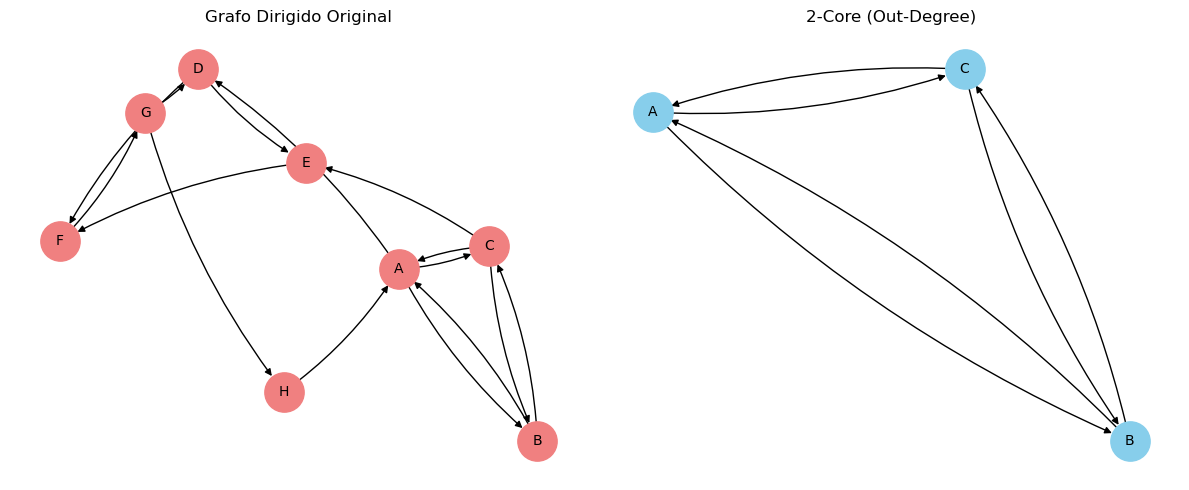

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Creamos un grafo dirigido de ejemplo
G_dir_example = nx.DiGraph()
G_dir_example.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('A', 'D'), # Nodo A: out-degree 3
    ('B', 'A'), ('B', 'C'),             # Nodo B: out-degree 2
    ('C', 'A'), ('C', 'B'), ('C', 'E'), # Nodo C: out-degree 3
    ('D', 'E'), ('D', 'F'),             # Nodo D: out-degree 2
    ('E', 'F'),                         # Nodo E: out-degree 1
    ('F', 'G'),                         # Nodo F: out-degree 1
    ('G', 'D'), ('G', 'H'),             # Nodo G: out-degree 2
    ('H', 'A')                          # Nodo H: out-degree 1
])


k_to_test = 2
print(f"Calculando el {k_to_test}-core (basado en out-degree) para el grafo de ejemplo.\n")
print("Grados de salida en el grafo original:")
for node in sorted(G_dir_example.nodes()):
    print(f"  Nodo {node}: out-degree = {G_dir_example.out_degree(node)}")

try:
    # Calculamos el k-core usando la función del estudiante
    k_core_graph_dir = k_core_out_degree(G_dir_example, k_to_test)

    print(f"\nNodos en el {k_to_test}-core (out-degree): {sorted(list(k_core_graph_dir.nodes()))}")
    if k_core_graph_dir.nodes():
        print(f"Grados de salida dentro del {k_to_test}-core:")
        for node_in_core in sorted(k_core_graph_dir.nodes()):
            print(f"  Nodo {node_in_core}: out-degree en el core = {k_core_graph_dir.out_degree(node_in_core)}")
    else:
        print(f"El {k_to_test}-core resultante está vacío.")

    # Visualización
    pos_dir = nx.spring_layout(G_dir_example, seed=42)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    nx.draw(G_dir_example, pos_dir, with_labels=True, node_color='lightcoral', 
            node_size=800, font_size=10, arrows=True, connectionstyle='arc3,rad=0.1')
    plt.title("Grafo Dirigido Original")
    
    plt.subplot(1, 2, 2)
    if k_core_graph_dir.nodes():
         # Dibuja solo los nodos del core, pero usa las posiciones del grafo original
        nx.draw(k_core_graph_dir, pos_dir, with_labels=True, node_color='skyblue', 
                node_size=800, font_size=10, arrows=True, connectionstyle='arc3,rad=0.1',
                nodelist=list(k_core_graph_dir.nodes())) # Asegura que solo se dibujen nodos del core
    else:
        # Si el core es vacío, dibuja un placeholder o nada
        plt.text(0.5, 0.5, "Core Vacío", ha="center", va="center", fontsize=12)

    plt.title(f"{k_to_test}-Core (Out-Degree)")
    
    plt.tight_layout()
    plt.show()

except NameError:
    print("La función 'k_core_out_degree_solucion' no está definida. Por favor, ejecute la celda de solución primero.")
except Exception as e:
    print(f"Ocurrió un error durante la explicación: {e}")
